<a href="https://colab.research.google.com/github/hks1409/ML-Models/blob/main/ML_Models_AI_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERVISED LEARNING ALGORITHM - Linear Regression 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

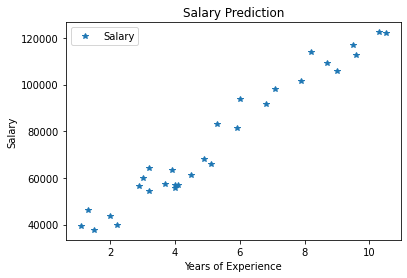

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.shape
(30,2)
dataset.head()
dataset.describe()

dataset.plot(x='YearsExperience',y='Salary',style='*')
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

df

,Actual,Predicted
0,37731.0,41050.789634
1,122391.0,121866.403084
2,57081.0,64928.129972
3,63218.0,63091.411484
4,116969.0,114519.529134
5,109431.0,107172.655184
6,112635.0,115437.888378
7,55794.0,64009.770728
8,83088.0,75948.440897
9,101302.0,99825.781234


UNSUPERVISED LEARNING ALGORITHM - KMeans Clustering

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('fish_measurements.csv', header = None, names = ['species','weight','length_1','length_2','length_3', 'height','width']) 
data.head()

,species,weight,length_1,length_2,length_3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
species = data.iloc[:,0] 
samples = data.iloc[:,1:] 
samples.head() 
ks = range(1, 6) 
inertias = []

for k in ks: 
  model = KMeans(n_clusters = k)  
  model.fit(samples)
  inertias.append(model.inertia_)

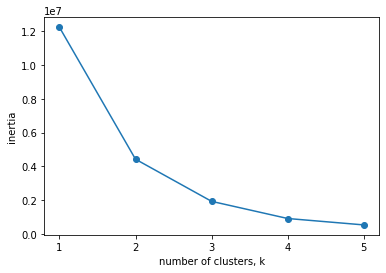

In [ ]:
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks) 
plt.show()

In [ ]:
model = KMeans(n_clusters = 4) 
model.fit(samples) 
labels = model.predict(samples)

print(labels)

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 1 1 3 3 3 3]


Sample data : 


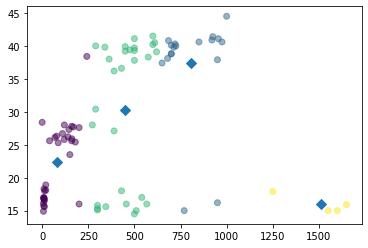

species  Bream  Pike  Roach  Smelt
labels                            
0            1     1     17     14
1           16     2      0      0
2           17    10      3      0
3            0     4      0      0


In [ ]:
print("Sample data : ") 
xs = samples.iloc[:,0] 
ys = samples.iloc[:,4] 
plt.scatter(xs, ys, c = labels, alpha = 0.5) 
centroids = model.cluster_centers_ 
centroids_x = centroids[:,0] 
centroids_y = centroids[:,4] 
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50) 
plt.show()

df = pd.DataFrame({'labels': labels, 'species': species}) 
#lets do a crosstab evaluation to verify the quality of our clustering 
ct = pd.crosstab(df['labels'], df['species']) 

print(ct)

REINFORCEMENT LEARNING ALGORITHM


In [ ]:
import numpy as np 
import pylab as plt

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

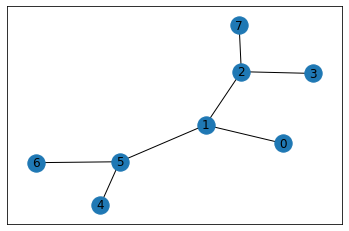

In [ ]:
goal = 7 

import networkx as nx 

G=nx.Graph() 
G.add_edges_from(points_list) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos) 
nx.draw_networkx_edges(G,pos) 
nx.draw_networkx_labels(G,pos) 
plt.show()

In [ ]:
MATRIX_SIZE = 8 
# create matrix x*y 

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE))) 
R *= -1

for point in points_list: 
  print(point) 
  if point[1] == goal: 
    R[point] = 100 
  else: 
    R[point] = 0 
    
  if point[0] == goal: 
    R[point[::-1]] = 100 
  else: 
    # reverse of point 
    R[point[::-1]]= 0

R[goal,goal]= 100 
print(R)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE])) 
# learning parameter 
gamma = 0.8 
initial_state = 1

def available_actions(state): 
  current_state_row = R[state,] 
  av_act = np.where(current_state_row >= 0)[1] 
  return av_act

available_act = available_actions(initial_state) 
def sample_next_action(available_actions_range): 
  next_action = int(np.random.choice(available_act,1)) 
  return next_action

action = sample_next_action(available_act) 
def update(current_state, action, gamma): 
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  if max_index.shape[0] > 1: 
    max_index = int(np.random.choice(max_index, size = 1)) 
  else: 
    max_index = int(max_index) 
  max_value = Q[action, max_index] 
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value 
  print('max_value', R[current_state, action] + gamma * max_value) 
  
  if (np.max(Q) > 0): 
    return(np.sum(Q/np.max(Q)*100)) 
  else: 
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
scores = [] 
for i in range(700): 
  current_state = np.random.randint(0, int(Q.shape[0])) 
  available_act = available_actions(current_state) 
  action = sample_next_action(available_act) 
  score = update(current_state,action,gamma) 
  scores.append(score) 
  print ('Score:', str(score)) 

print("Trained Q matrix:") 
print(Q/np.max(Q)*100)

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 180.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 115.2
Score: 379.55555555555554
max_value 0.0
Score: 379.55555555555554
max_value 115.2
Score: 379.55555555555554
max_value 92.16000000000001
Score: 430.75555555555553
max_value 144.0
Score: 510.75555555555553
max_value 144.0
Score: 510.75555555555553
max_value 0.0
Score: 510.75555555555553
max_value 0.0
Score: 510.75

Most efficient path:
[0, 1, 2, 7]


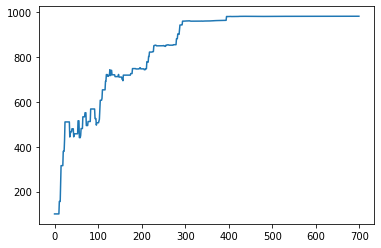

In [ ]:
current_state = 0 
steps = [current_state] 
while current_state != 7:
  next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] 
  if next_step_index.shape[0] > 1: 
    next_step_index = int(np.random.choice(next_step_index, size = 1)) 
  else: 
    next_step_index = int(next_step_index) 
  steps.append(next_step_index) 
  current_state = next_step_index 

print("Most efficient path:") 
print(steps) 
plt.plot(scores) 

plt.show()